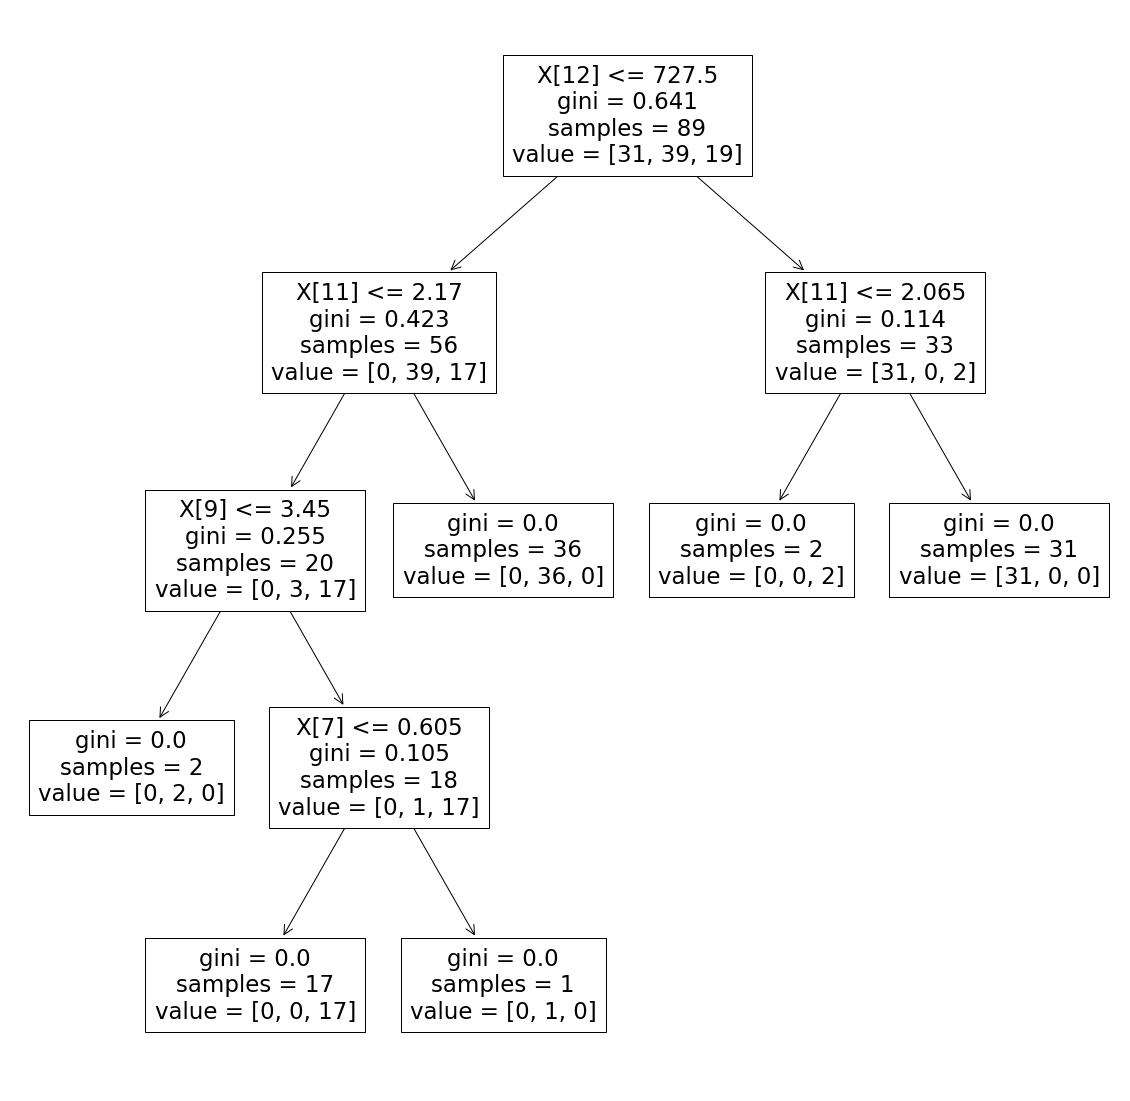

[0.         0.02191558 0.02194357 0.04110628 0.06112853 0.25028922
 0.26864781]
[0.8528735632183908, 0.8521072796934867, 0.8980842911877395, 0.8528735632183908, 0.8417624521072797, 0.8417624521072797, 0.6942528735632184]
4


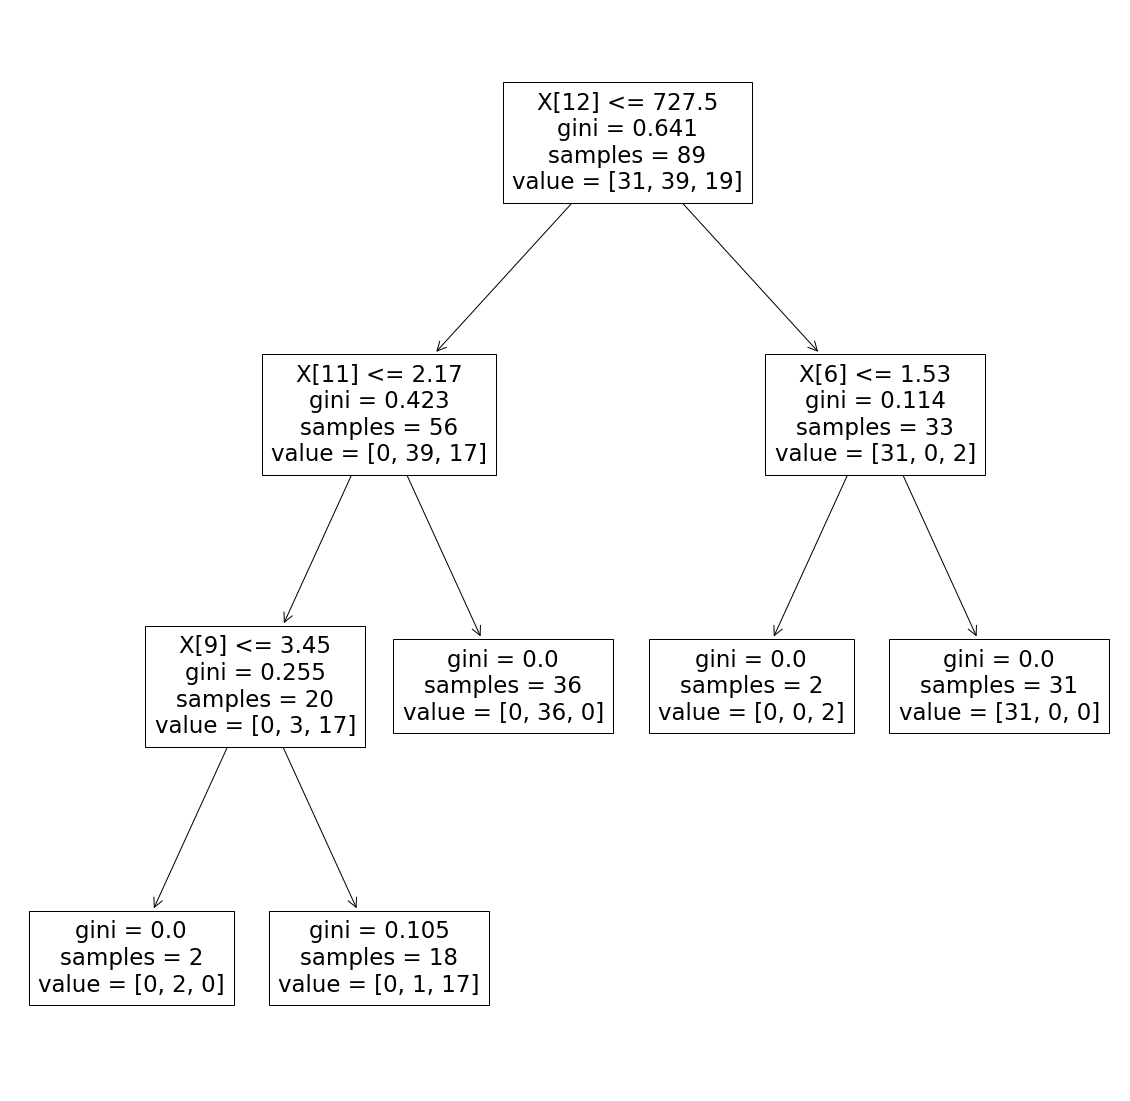

Głębokość drzewa głównego wynosi: 4


Text(0.5, 1.0, 'Zależność różnicy rozmiaru drzewa pełnego i optymalnego od liczby zmiennych')

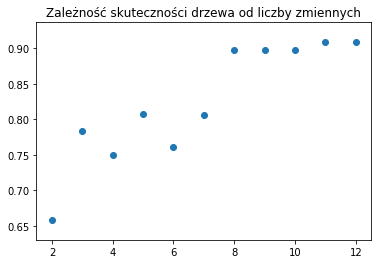

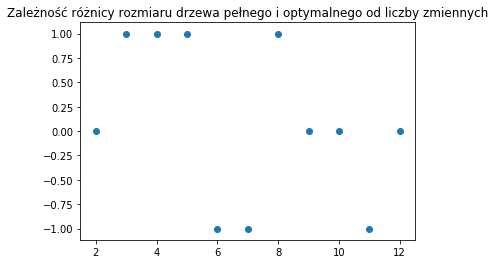

In [50]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

dane_raw = pd.read_csv('wine.data', sep=",", header=None)
dane_raw.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcanity of Ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

dane_shuffled = dane_raw.sample(frac=1)
dane_PU = dane_shuffled.iloc[0:89, :]
dane_PT = dane_shuffled.iloc[90:178, :]

wina_tree = tree.DecisionTreeClassifier()
wina_tree.fit(dane_PU.loc[:, 'Alcohol':'Proline'], dane_PU.loc[:, 'Class'])
glebokosc = wina_tree.get_depth()

#tree.plot_tree(wina_tree)
fig, ax = plt.subplots(figsize=(20, 20)) 
tree.plot_tree(wina_tree)
plt.show()

dane_NoClass_PT = dane_PT.loc[:, "Alcohol":"Proline"]

wina_tree.predict(dane_NoClass_PT) # przewidywanie dla PT na podstawie fitu z PU
path = wina_tree.cost_complexity_pruning_path(dane_NoClass_PT, dane_PT["Class"])
ccp_alphas = path.ccp_alphas # różne alphy dla PT

#poniżej szukanie odpowiedniego drzewa
trees = []
cross_scores = []
for cp in ccp_alphas:
    drzewo = tree.DecisionTreeClassifier(ccp_alpha=cp)
    drzewo.fit(dane_PU.loc[:, 'Alcohol':'Proline'], dane_PU.loc[:, 'Class'])
    trees.append(drzewo)
    drzewo.predict(dane_NoClass_PT)
    crossWalidacja = cross_validate(drzewo, dane_NoClass_PT, dane_PT["Class"], cv = 3)
    cross_scores.append(crossWalidacja["test_score"].mean())

print(ccp_alphas)
print(cross_scores)
best_index = cross_scores.index(max(cross_scores))
print(best_alpha)

fig_best, ax1 = plt.subplots(figsize=(20, 20)) 
tree.plot_tree(trees[best_index])
plt.show()





# poniżej to samo dla i parametrów

best_trees = []
best_trees_scores = []
i_list = []
best_trees_size_differences  = []
for i in range(0, 11):
    wina_tree = tree.DecisionTreeClassifier()
    wina_tree.fit(dane_PU.iloc[:, 1:i+2], dane_PU.loc[:, 'Class'])
    dane_NoClass_PT = dane_PT.iloc[:, 1:i+2]
    wina_tree.predict(dane_NoClass_PT) # przewidywanie dla PT na podstawie fitu z PU
    path = wina_tree.cost_complexity_pruning_path(dane_NoClass_PT, dane_PT["Class"])
    ccp_alphas = path.ccp_alphas # różne alphy dla PT
    #poniżej szukanie odpowiedniego drzewa
    trees = []
    cross_scores = []
    for cp in ccp_alphas:
        drzewo = tree.DecisionTreeClassifier(ccp_alpha=cp)
        drzewo.fit(dane_PU.iloc[:, 1:i+2], dane_PU.loc[:, 'Class'])
        trees.append(drzewo)
        drzewo.predict(dane_NoClass_PT)
        crossWalidacja = cross_validate(drzewo, dane_NoClass_PT, dane_PT["Class"], cv = 3)
        cross_scores.append(crossWalidacja["test_score"].mean())
    best_trees_scores.append(max(cross_scores))
    best_index = cross_scores.index(max(cross_scores))
    best_trees.append(trees[best_index])
    best_trees_size_differences.append(glebokosc-trees[best_index].get_depth())
    i_list.append(i+2)

# poniżej wykresy zależności od liczby zmiennych
fig, ax = plt.subplots(1, 1)
ax.scatter(i_list, best_trees_scores)
ax.set_title('Zależność skuteczności drzewa od liczby zmiennych')

print("Głębokość drzewa głównego wynosi: "+str(glebokosc))
fig, ax = plt.subplots(1, 1)
ax.scatter(i_list, best_trees_size_differences)
ax.set_title('Zależność różnicy rozmiaru drzewa pełnego i optymalnego od liczby zmiennych')